In [2]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
train = __import__('6-train').train

def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

if __name__ == '__main__':
    lib= np.load('../data/MNIST.npz')
    X_train_3D = lib['X_train']
    Y_train = lib['Y_train']
    X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
    Y_train_oh = one_hot(Y_train, 10)
    X_valid_3D = lib['X_valid']
    Y_valid = lib['Y_valid']
    X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
    Y_valid_oh = one_hot(Y_valid, 10)

    layer_sizes = [256, 256, 10]
    activations = [tf.nn.tanh, tf.nn.tanh, None]
    alpha = 0.01
    iterations = 1000

    tf.set_random_seed(0)
    save_path = train(X_train, Y_train_oh, X_valid, Y_valid_oh, layer_sizes,
                      activations, alpha, iterations, save_path="./model.ckpt")
    print("Model saved in path: {}".format(save_path))

After 0 iterations:
	Training Cost: 2.3389201164245605
	Training Accuracy: 0.1281999945640564
	Validation Cost: 2.3470876216888428
	Validation Accuracy: 0.11900000274181366
After 100 iterations:
	Training Cost: 1.1307154893875122
	Training Accuracy: 0.7742599844932556
	Validation Cost: 1.0977574586868286
	Validation Accuracy: 0.796999990940094
After 200 iterations:
	Training Cost: 0.7912304401397705
	Training Accuracy: 0.8301600217819214
	Validation Cost: 0.7469470500946045
	Validation Accuracy: 0.8515999913215637
After 300 iterations:
	Training Cost: 0.6461941003799438
	Training Accuracy: 0.8505600094795227
	Validation Cost: 0.5998932719230652
	Validation Accuracy: 0.870199978351593
After 400 iterations:
	Training Cost: 0.566304087638855
	Training Accuracy: 0.8616799712181091
	Validation Cost: 0.5207230448722839
	Validation Accuracy: 0.8792999982833862
After 500 iterations:
	Training Cost: 0.5153665542602539
	Training Accuracy: 0.8699600100517273
	Validation Cost: 0.47134989500045776


INFO:tensorflow:Restoring parameters from ./model.ckpt
Test Accuracy: 0.8997
Test Cost: 0.37787756


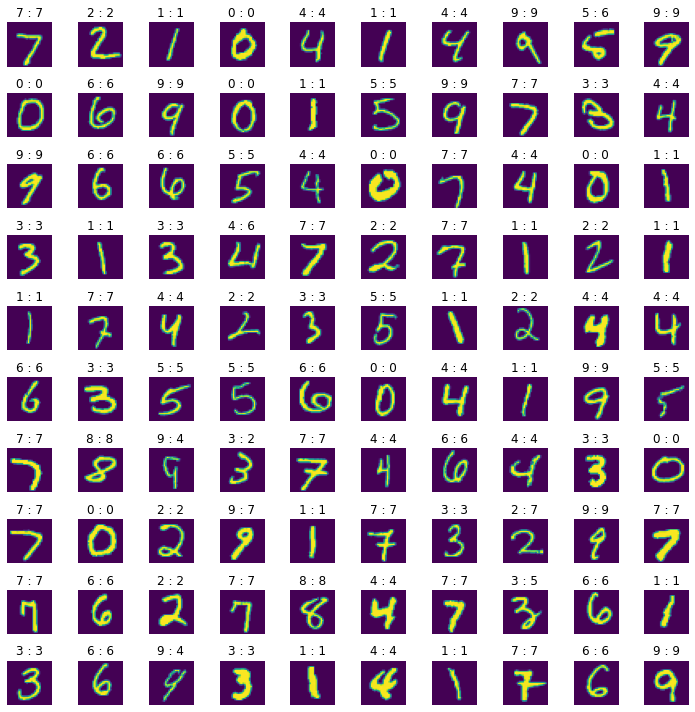

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
evaluate = __import__('7-evaluate').evaluate

def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

if __name__ == '__main__':
    lib= np.load('../data/MNIST.npz')
    X_test_3D = lib['X_test']
    Y_test = lib['Y_test']
    X_test = X_test_3D.reshape((X_test_3D.shape[0], -1))
    Y_test_oh = one_hot(Y_test, 10)

    Y_pred_oh, accuracy, cost = evaluate(X_test, Y_test_oh, './model.ckpt')
    print("Test Accuracy:", accuracy)
    print("Test Cost:", cost)

    Y_pred = np.argmax(Y_pred_oh, axis=1)

    fig = plt.figure(figsize=(10, 10))
    for i in range(100):
        fig.add_subplot(10, 10, i + 1)
        plt.imshow(X_test_3D[i])
        plt.title(str(Y_test[i]) + ' : ' + str(Y_pred[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()